In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
data = pd.read_csv('1 NYC_Flight_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


# Data cleaning 

In [67]:
test = data   # creating test data for cleaning

In [68]:
test.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,10,1,1955.0,2001,-6.0,2213.0,2248,-35.0,B6,65,N554JB,JFK,ABQ,230.0,1826,20,1,01-10-2013 20:00
1,2013,10,2,2010.0,2001,9.0,2230.0,2248,-18.0,B6,65,N607JB,JFK,ABQ,238.0,1826,20,1,02-10-2013 20:00
2,2013,10,3,1955.0,2001,-6.0,2232.0,2248,-16.0,B6,65,N591JB,JFK,ABQ,251.0,1826,20,1,03-10-2013 20:00
3,2013,10,4,2017.0,2001,16.0,2304.0,2248,16.0,B6,65,N662JB,JFK,ABQ,257.0,1826,20,1,04-10-2013 20:00
4,2013,10,5,1959.0,1959,0.0,2226.0,2246,-20.0,B6,65,N580JB,JFK,ABQ,242.0,1826,19,59,05-10-2013 19:00


In [69]:
test.carrier.unique()

array(['B6', 'EV', 'UA', 'DL', 'MQ', 'FL', '9E', 'WN', 'AA', 'US', 'OO',
       'YV', 'F9', 'HA', 'VX', 'AS'], dtype=object)

In [70]:
['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'US: US Airways', 'YV: Mesa Airlines', 'HA: Hawaiian Airlines', 'EV: Atlantic Southeast Airlines', 'FL: AirTran Airways', 'F9: Frontier Airlines', 'VX: Virgin America', 'B6: JetBlue Airways', '9E: Pinnacle Airlines', 'AS: Alaska Airlines']

['WN: Southwest Airlines',
 'AA: American Airlines',
 'MQ: American Eagle Airlines',
 'UA: United Airlines',
 'OO: Skywest Airlines',
 'DL: Delta Airlines',
 'US: US Airways',
 'YV: Mesa Airlines',
 'HA: Hawaiian Airlines',
 'EV: Atlantic Southeast Airlines',
 'FL: AirTran Airways',
 'F9: Frontier Airlines',
 'VX: Virgin America',
 'B6: JetBlue Airways',
 '9E: Pinnacle Airlines',
 'AS: Alaska Airlines']

# Cleaning NA values of carriers 
  Carrier EV first

In [71]:
Carrier_analyser = test[test['carrier']=='EV'].loc[:]           # slicing carrier EV from test

In [72]:
# combining the important values to save spave and time

Carrier_analyser['speed'] = (Carrier_analyser['distance']/(Carrier_analyser['air_time']/60)).round(2)
mean_speed = Carrier_analyser['speed'].mean()
mean_speed

Carrier_analyser['air_time'] =Carrier_analyser['air_time'].fillna(Carrier_analyser['distance']/mean_speed)
Carrier_analyser['air_time'].notnull().value_counts() 


Carrier_analyser['speed'] = Carrier_analyser.speed.fillna(Carrier_analyser['distance']/Carrier_analyser['air_time'])

Carrier_analyser['arr_delay'] = Carrier_analyser['arr_delay'].fillna(-Carrier_analyser['sched_arr_time'] + Carrier_analyser['arr_time'])

#converting remaininng arrival time equal to scheduled time
Carrier_analyser['arr_time'] = Carrier_analyser['arr_time'].fillna(Carrier_analyser['sched_arr_time'])


Carrier_analyser['dep_time'] = Carrier_analyser['dep_time'].fillna(Carrier_analyser['sched_dep_time'] + Carrier_analyser['dep_delay'])

Carrier_analyser.info()
EVdf = Carrier_analyser


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54173 entries, 519 to 336773
Data columns (total 20 columns):
year              54173 non-null int64
month             54173 non-null int64
day               54173 non-null int64
dep_time          51356 non-null float64
sched_dep_time    54173 non-null int64
dep_delay         51356 non-null float64
arr_time          54173 non-null float64
sched_arr_time    54173 non-null int64
arr_delay         51251 non-null float64
carrier           54173 non-null object
flight            54173 non-null int64
tailnum           54173 non-null object
origin            54173 non-null object
dest              54173 non-null object
air_time          54173 non-null float64
distance          54173 non-null int64
hour              54173 non-null int64
minute            54173 non-null int64
time_hour         54173 non-null object
speed             54173 non-null float64
dtypes: float64(6), int64(9), object(5)
memory usage: 8.7+ MB


In [73]:
# arrival delay need to be corrected yet

Carrier_analyser['arr_delay'] = Carrier_analyser['arr_delay'].fillna(Carrier_analyser['arr_time']-Carrier_analyser['sched_arr_time'])

In [74]:
#converting remaininng arrival time equal to scheduled time
Carrier_analyser['dep_time'] = Carrier_analyser['dep_time'].fillna(Carrier_analyser['sched_dep_time'])
Carrier_analyser['dep_delay'] = Carrier_analyser['dep_delay'].fillna(Carrier_analyser['dep_time']-Carrier_analyser['sched_dep_time'])
Carrier_analyser.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54173 entries, 519 to 336773
Data columns (total 20 columns):
year              54173 non-null int64
month             54173 non-null int64
day               54173 non-null int64
dep_time          54173 non-null float64
sched_dep_time    54173 non-null int64
dep_delay         54173 non-null float64
arr_time          54173 non-null float64
sched_arr_time    54173 non-null int64
arr_delay         54173 non-null float64
carrier           54173 non-null object
flight            54173 non-null int64
tailnum           54173 non-null object
origin            54173 non-null object
dest              54173 non-null object
air_time          54173 non-null float64
distance          54173 non-null int64
hour              54173 non-null int64
minute            54173 non-null int64
time_hour         54173 non-null object
speed             54173 non-null float64
dtypes: float64(6), int64(9), object(5)
memory usage: 8.7+ MB


NA values are filled

In [75]:
del Carrier_analyser
test.carrier.unique()

array(['B6', 'EV', 'UA', 'DL', 'MQ', 'FL', '9E', 'WN', 'AA', 'US', 'OO',
       'YV', 'F9', 'HA', 'VX', 'AS'], dtype=object)

# Analysing carrier B6

In [76]:
Carrier_analyser = test[test['carrier'] == 'B6'].loc[:]

In [77]:
Carrier_analyser.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54635 entries, 0 to 334691
Data columns (total 19 columns):
year              54635 non-null int64
month             54635 non-null int64
day               54635 non-null int64
dep_time          54169 non-null float64
sched_dep_time    54635 non-null int64
dep_delay         54169 non-null float64
arr_time          54137 non-null float64
sched_arr_time    54635 non-null int64
arr_delay         54049 non-null float64
carrier           54635 non-null object
flight            54635 non-null int64
tailnum           54635 non-null object
origin            54635 non-null object
dest              54635 non-null object
air_time          54049 non-null float64
distance          54635 non-null int64
hour              54635 non-null int64
minute            54635 non-null int64
time_hour         54635 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 8.3+ MB


In [78]:
#calculations here

Carrier_analyser['speed'] = (Carrier_analyser['distance']/(Carrier_analyser['air_time']/60)).round(2)
mean_speed = Carrier_analyser['speed'].mean()
mean_speed

Carrier_analyser['air_time'] =Carrier_analyser['air_time'].fillna(Carrier_analyser['distance']/mean_speed)
Carrier_analyser['air_time'].notnull().value_counts() 


Carrier_analyser['speed'] = Carrier_analyser.speed.fillna(Carrier_analyser['distance']/Carrier_analyser['air_time'])

Carrier_analyser['arr_delay'] = Carrier_analyser['arr_delay'].fillna(-Carrier_analyser['sched_arr_time'] + Carrier_analyser['arr_time'])

#converting remaininng arrival time equal to scheduled time
Carrier_analyser['arr_time'] = Carrier_analyser['arr_time'].fillna(Carrier_analyser['sched_arr_time'])


Carrier_analyser['dep_time'] = Carrier_analyser['dep_time'].fillna(Carrier_analyser['sched_dep_time'] + Carrier_analyser['dep_delay'])

Carrier_analyser.info()
B6df = Carrier_analyser

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54635 entries, 0 to 334691
Data columns (total 20 columns):
year              54635 non-null int64
month             54635 non-null int64
day               54635 non-null int64
dep_time          54169 non-null float64
sched_dep_time    54635 non-null int64
dep_delay         54169 non-null float64
arr_time          54635 non-null float64
sched_arr_time    54635 non-null int64
arr_delay         54137 non-null float64
carrier           54635 non-null object
flight            54635 non-null int64
tailnum           54635 non-null object
origin            54635 non-null object
dest              54635 non-null object
air_time          54635 non-null float64
distance          54635 non-null int64
hour              54635 non-null int64
minute            54635 non-null int64
time_hour         54635 non-null object
speed             54635 non-null float64
dtypes: float64(6), int64(9), object(5)
memory usage: 8.8+ MB


In [79]:
# arrival delay needs to be corrected yet

Carrier_analyser['arr_delay'] = Carrier_analyser['arr_delay'].fillna(Carrier_analyser['arr_time']-Carrier_analyser['sched_arr_time'])

In [80]:
Carrier_analyser['arr_delay'] = Carrier_analyser['arr_delay'].fillna(Carrier_analyser['arr_time']-Carrier_analyser['sched_arr_time'])

#converting remaininng arrival time equal to scheduled time
Carrier_analyser['dep_time'] = Carrier_analyser['dep_time'].fillna(Carrier_analyser['sched_dep_time'])
Carrier_analyser['dep_delay'] = Carrier_analyser['dep_delay'].fillna(Carrier_analyser['dep_time']-Carrier_analyser['sched_dep_time'])
Carrier_analyser.info()
del Carrier_analyser
test.carrier.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54635 entries, 0 to 334691
Data columns (total 20 columns):
year              54635 non-null int64
month             54635 non-null int64
day               54635 non-null int64
dep_time          54635 non-null float64
sched_dep_time    54635 non-null int64
dep_delay         54635 non-null float64
arr_time          54635 non-null float64
sched_arr_time    54635 non-null int64
arr_delay         54635 non-null float64
carrier           54635 non-null object
flight            54635 non-null int64
tailnum           54635 non-null object
origin            54635 non-null object
dest              54635 non-null object
air_time          54635 non-null float64
distance          54635 non-null int64
hour              54635 non-null int64
minute            54635 non-null int64
time_hour         54635 non-null object
speed             54635 non-null float64
dtypes: float64(6), int64(9), object(5)
memory usage: 8.8+ MB


array(['B6', 'EV', 'UA', 'DL', 'MQ', 'FL', '9E', 'WN', 'AA', 'US', 'OO',
       'YV', 'F9', 'HA', 'VX', 'AS'], dtype=object)

# Creating a function to solve NA values

In [81]:
test.carrier.unique()

array(['B6', 'EV', 'UA', 'DL', 'MQ', 'FL', '9E', 'WN', 'AA', 'US', 'OO',
       'YV', 'F9', 'HA', 'VX', 'AS'], dtype=object)

In [82]:
Carrier_analyser = test[test['carrier'] == 'UA'].loc[:]
Carrier_analyser.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58665 entries, 958 to 334692
Data columns (total 19 columns):
year              58665 non-null int64
month             58665 non-null int64
day               58665 non-null int64
dep_time          57979 non-null float64
sched_dep_time    58665 non-null int64
dep_delay         57979 non-null float64
arr_time          57916 non-null float64
sched_arr_time    58665 non-null int64
arr_delay         57782 non-null float64
carrier           58665 non-null object
flight            58665 non-null int64
tailnum           57979 non-null object
origin            58665 non-null object
dest              58665 non-null object
air_time          57782 non-null float64
distance          58665 non-null int64
hour              58665 non-null int64
minute            58665 non-null int64
time_hour         58665 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 9.0+ MB


In [83]:
def misssing_value_corrector(carrier_name):
    # combining the important values to save spave and time
    Carrier_analyser = test[test['carrier'] == carrier_name].loc[:]

    Carrier_analyser['speed'] = (Carrier_analyser['distance']/(Carrier_analyser['air_time']/60)).round(2)
    mean_speed = Carrier_analyser['speed'].mean()
    mean_speed

    Carrier_analyser['air_time'] =Carrier_analyser['air_time'].fillna(Carrier_analyser['distance']/mean_speed)
    Carrier_analyser['air_time'].notnull().value_counts() 


    Carrier_analyser['speed'] = Carrier_analyser.speed.fillna(Carrier_analyser['distance']/Carrier_analyser['air_time'])

    Carrier_analyser['arr_delay'] = Carrier_analyser['arr_delay'].fillna(-Carrier_analyser['sched_arr_time'] + Carrier_analyser['arr_time'])

    #converting remaininng arrival time equal to scheduled time
    Carrier_analyser['arr_time'] = Carrier_analyser['arr_time'].fillna(Carrier_analyser['sched_arr_time'])


    Carrier_analyser['dep_time'] = Carrier_analyser['dep_time'].fillna(Carrier_analyser['sched_dep_time'] + Carrier_analyser['dep_delay'])


    Carrier_analyser['arr_delay'] = Carrier_analyser['arr_delay'].fillna(Carrier_analyser['arr_time']-Carrier_analyser['sched_arr_time'])

    #converting remaininng arrival time equal to scheduled time
    Carrier_analyser['dep_time'] = Carrier_analyser['dep_time'].fillna(Carrier_analyser['sched_dep_time'])
    Carrier_analyser['dep_delay'] = Carrier_analyser['dep_delay'].fillna(Carrier_analyser['dep_time']-Carrier_analyser['sched_dep_time'])
    
    return Carrier_analyser

        
        

In [84]:
#Correcting values by using the fucntion 
# passing string value to function

UAdf = misssing_value_corrector('UA')
DLdf = misssing_value_corrector('DL')
MQdf = misssing_value_corrector('MQ')
FLdf = misssing_value_corrector('FL')
_9Edf = misssing_value_corrector('9E')
WNdf = misssing_value_corrector('WN')
AAdf = misssing_value_corrector('AA')
USdf = misssing_value_corrector('US')
OOdf = misssing_value_corrector('OO')
YVdf = misssing_value_corrector('YV')
F9df = misssing_value_corrector('F9')
HAdf = misssing_value_corrector('HA')
VXdf = misssing_value_corrector('VX')
ASdf = misssing_value_corrector('AS')

# Combining each carriers to make a fresh DataFrame 

## Concatenating data from each Carrier

In [134]:
flight_data = pd.DataFrame()
flight_data= pd.concat([EVdf, B6df,UAdf,DLdf,MQdf,FLdf,_9Edf,WNdf, AAdf,USdf,OOdf,YVdf,F9df,HAdf,VXdf,ASdf])

flight_data.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,speed
count,336776.0,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1352.618856,1344.254840,12.329263,1506.322173,1536.380220,6.659771,1971.923620,146.521215,1039.912604,13.180247,26.230100,393.773040
std,0.0,3.414457,8.768607,487.765235,467.335756,39.762251,532.172522,497.457142,56.537533,1632.471938,95.572078,733.233033,4.661316,19.300846,60.032108
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-2228.000000,1.000000,0.049716,17.000000,1.000000,0.000000,76.800000
25%,2013.0,4.000000,8.000000,910.000000,906.000000,-5.000000,1107.000000,1124.000000,-16.000000,553.000000,78.000000,502.000000,9.000000,8.000000,358.570000
50%,2013.0,7.000000,16.000000,1407.000000,1359.000000,-1.000000,1540.000000,1556.000000,-4.000000,1496.000000,126.000000,872.000000,13.000000,29.000000,403.180000
75%,2013.0,10.000000,23.000000,1747.000000,1729.000000,10.000000,1942.000000,1945.000000,13.000000,3465.000000,188.000000,1389.000000,17.000000,44.000000,437.850000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000,703.380000


In [87]:
flight_data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed
519,2013,1,1,1315.0,1317,-2.0,1413.0,1423,-10.0,EV,4112,N13538,EWR,ALB,33.0,143,13,17,01-01-2013 13:00,260.00
520,2013,1,1,1655.0,1621,34.0,1804.0,1724,40.0,EV,3260,N19554,EWR,ALB,36.0,143,16,21,01-01-2013 16:00,238.33
521,2013,1,1,2056.0,2004,52.0,2156.0,2112,44.0,EV,4170,N12540,EWR,ALB,31.0,143,20,4,01-01-2013 20:00,276.77
522,2013,1,2,1332.0,1327,5.0,1419.0,1433,-14.0,EV,4316,N14153,EWR,ALB,33.0,143,13,27,02-01-2013 13:00,260.00
523,2013,1,2,1746.0,1621,85.0,1835.0,1724,71.0,EV,3260,N14153,EWR,ALB,31.0,143,16,21,02-01-2013 16:00,276.77


# From Travellers point of view
1 Delay in flight arrival and departure

In [88]:
flight_data['DATE'] = pd.to_datetime(flight_data[['year','month','day']], yearfirst=True)
month_dict = {
    1: '01-January',
    2: '02-February',
    3: '03-March',
    4: '04-April',
    5: '05-May',
    6: '06-June',
    7: '07-July',
    8: '08-August',
    9: '09-September',
    10: '10-October',
    11: '11-November',
    12: '12-December'
    
}
flight_data['month_desc'] = flight_data['month'].apply(lambda m: month_dict[m])
flight_data.sample(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,speed,DATE,month_desc
83594,2013,7,24,934.0,830,64.0,1132.0,1032,60.0,EV,...,EWR,CVG,98.0,569,8,30,24-07-2013 08:00,348.37,2013-07-24,07-July
168162,2013,12,12,1642.0,1645,-3.0,2013.0,2019,-6.0,DL,...,JFK,LAX,352.0,2475,16,45,12-12-2013 16:00,421.88,2013-12-12,12-December
41063,2013,7,29,2143.0,2145,-2.0,2254.0,2316,-22.0,DL,...,JFK,BOS,39.0,187,21,45,29-07-2013 21:00,287.69,2013-07-29,07-July
33864,2013,2,13,1245.0,1250,-5.0,1344.0,1354,-10.0,B6,...,JFK,BOS,41.0,187,12,50,13-02-2013 12:00,273.66,2013-02-13,02-February
291052,2013,7,8,1720.0,1604,76.0,2029.0,1819,130.0,EV,...,EWR,SAV,100.0,708,16,4,08-07-2013 16:00,424.80,2013-07-08,07-July


In [89]:
flt_data_copy= flight_data.dropna()         # dropping the values which cannot be calculated

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

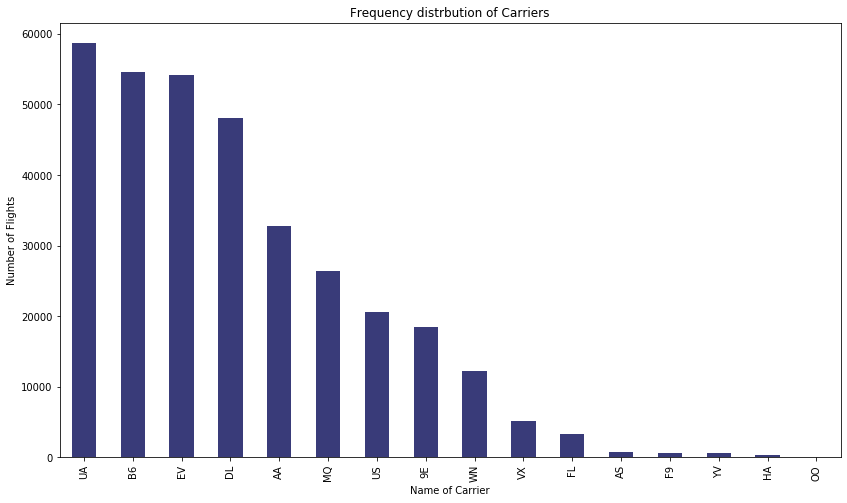

In [90]:
# Number of scheduled departure per carrier in 2013
carrier_count = flight_data['carrier'].value_counts()
plt.figure(figsize = (14, 8))
carrier_count.plot(kind = 'bar',cmap = 'tab20b')
plt.title('Frequency distrbution of Carriers')
plt.ylabel('Number of Flights')
plt.xlabel('Name of Carrier')
plt.savefig('A-001, freq dist of  carriers')
carrier_count

      There are 16 Carriers
    This shows UA is the biggest player followed by B6, EV and DL, where as YV HA and OO are the least players in NYC

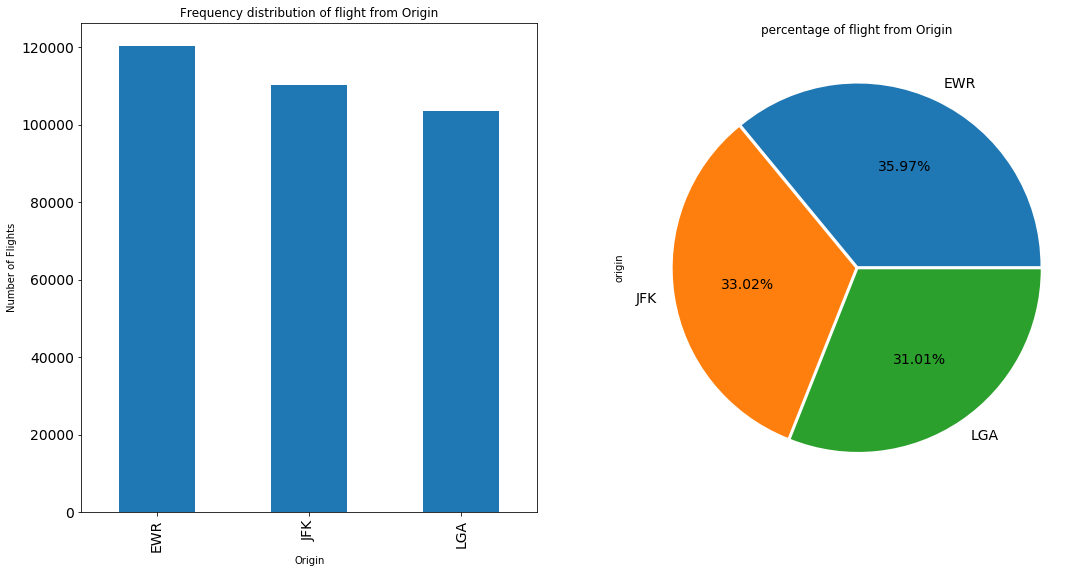

In [91]:
f, ax = plt.subplots(1,2, figsize = (18, 9))
origin_count = flt_data_copy['origin'].value_counts().plot(kind = 'bar',ax = ax[0],fontsize = 14, )
ax[0].set_title('Frequency distribution of flight from Origin')
ax[0].set_ylabel('Number of Flights')
ax[0].set_xlabel('Origin')

origin_count = flt_data_copy['origin'].value_counts().plot(kind = 'pie',explode = [.01,.01,.01] ,ax = ax[1],autopct= '%1.2f%%',fontsize = 14,)
ax[1].set_title('percentage of flight from Origin')
plt.savefig('A-002, freq dist of flight from origin')

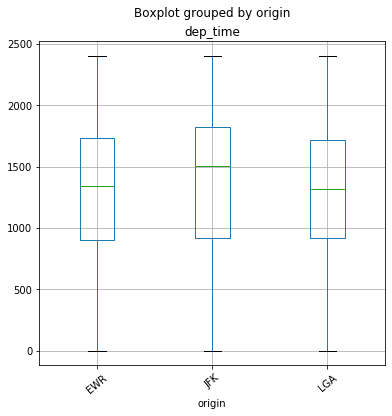

<Figure size 432x288 with 0 Axes>

In [92]:
flt_data_copy.boxplot('dep_time','origin', rot = 40, figsize=(6,6))
plt.show()
plt.savefig('A-003, boxplot grouped by origin')

In [93]:
print("The highest  range (900 to 1800) is for JFK, where 75% flights are falling under\n the departure time of 1800 and middle data point for departure is 1500 ")

The highest  range (900 to 1800) is for JFK, where 75% flights are falling under
 the departure time of 1800 and middle data point for departure is 1500 


In [94]:
allflight_NYC=flt_data_copy['dest'].unique()
allflight_NYC

array(['ALB', 'ATL', 'AVL', 'BDL', 'BGR', 'BHM', 'BNA', 'BOS', 'BTV',
       'BUF', 'BWI', 'CAE', 'CHO', 'CHS', 'CLE', 'CLT', 'CMH', 'CVG',
       'DAY', 'DCA', 'DFW', 'DSM', 'DTW', 'GRR', 'GSO', 'GSP', 'IAD',
       'ILM', 'IND', 'JAX', 'MCI', 'MEM', 'MHT', 'MKE', 'MSN', 'MSP',
       'MSY', 'MYR', 'OKC', 'OMA', 'ORD', 'ORF', 'PBI', 'PHL', 'PIT',
       'PVD', 'PWM', 'RDU', 'RIC', 'ROC', 'SAV', 'SBN', 'SDF', 'SRQ',
       'STL', 'SYR', 'TPA', 'TUL', 'TVC', 'TYS', 'XNA', 'ABQ', 'ACK',
       'AUS', 'BQN', 'BUR', 'DEN', 'FLL', 'HOU', 'LAS', 'LAX', 'LGB',
       'MCO', 'MVY', 'OAK', 'PDX', 'PHX', 'PSE', 'RSW', 'SAN', 'SEA',
       'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'ANC', 'BZN', 'EGE', 'HDN',
       'HNL', 'IAH', 'JAC', 'MIA', 'MTJ', 'SAT', 'SNA', 'STT', 'EYW',
       'CRW', 'CAK', 'LEX', 'MDW', 'PSP'], dtype=object)

In [95]:
print('The total number of destination flight from NYC is {} '.format(len(allflight_NYC)))
print('There are {} origins available'.format(len(flight_data['origin'].unique())))

The total number of destination flight from NYC is 104 
There are 3 origins available


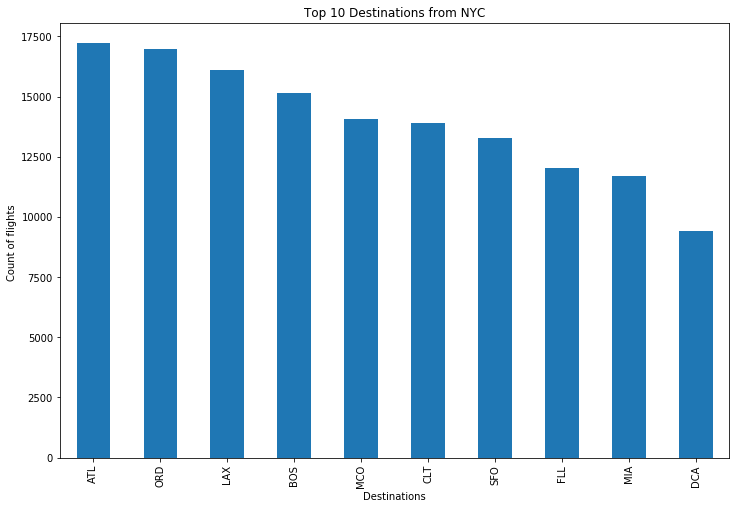

In [96]:
#Top10 destination flight from NYC in bar graph

plt.figure(figsize = (12,8))
flt_data_copy['dest'].value_counts().head(10).plot.bar()
plt.title('Top 10 Destinations from NYC')
plt.ylabel('Count of flights ')
plt.xlabel('Destinations')
plt.savefig('A-004 Top 10 destination from NYC')

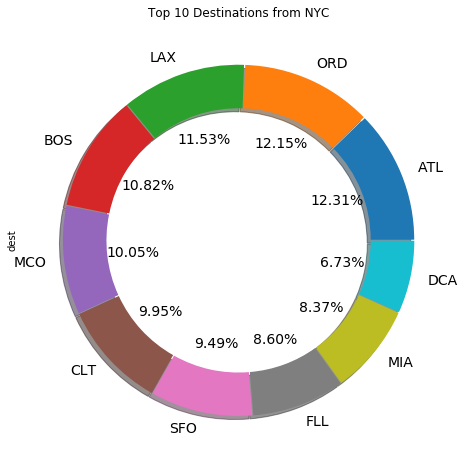

In [97]:
#Percentage of flight from destinations
flt_data_copy['dest'].value_counts().head(10).plot(kind = 'pie', legend = False, shadow = True, wedgeprops=dict(width=0.25),explode = [0.01,0.01,0.01,0.01,.01,.01,0.01,0.01,0.01,0.01],autopct = '%1.2f%%',fontsize = 14, figsize = (10,8))
plt.title('Top 10 Destinations from NYC')
plt.savefig('A-005 Top 10 Destiantion from NYC')
plt.show()

In [98]:
#  Maximum number of flights headed to unique destination from Origin.
dest_flight = flt_data_copy.groupby('origin')['dest'].value_counts()
dest_flight.head(10)

origin  dest
EWR     ORD     6019
        BOS     5285
        SFO     5097
        ATL     5022
        CLT     4974
        MCO     4921
        LAX     4888
        IAH     3932
        FLL     3775
        DTW     3167
Name: dest, dtype: int64

# Problem Statement _ Delay Information
Average departure delay per month and Carriers

In [99]:
monthly_avg_delay = flt_data_copy.groupby(['carrier', 'month_desc'], axis = 0, as_index = True).agg({'dep_delay':'mean'})
monthly_avg_delay.head(15)

dep_delay
carrier month_desc             
9E      01-January    16.882510
        02-February   16.486327
        03-March      13.407530
        04-April      13.567164
        05-May        22.672190
        06-June       28.952978
        07-July       31.398827
        08-August     17.296807
        09-September   7.754232
        10-October     9.334348
        11-November    7.564444
        12-December   19.781088
AA      01-January     6.788400
        02-February    8.098454
        03-March       8.572300

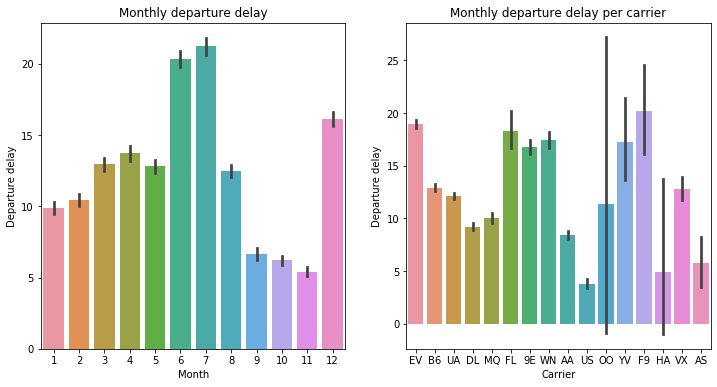

In [106]:
f, axes = plt.subplots(1,2, figsize =(12, 6))
sns.barplot(x='month', y='dep_delay',data=flt_data_copy, ax = axes[0])
axes[0].set_title('Monthly departure delay')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Departure delay')


# sort Monthly department delay based on Carrier

sns.barplot(x='carrier', y='dep_delay',data=flt_data_copy,ax = axes[1])
axes[1].set_title('Monthly departure delay per carrier')
axes[1].set_xlabel('Carrier')
axes[1].set_ylabel('Departure delay')

plt.savefig('A-006 monthly Dep delay ')
plt.show()

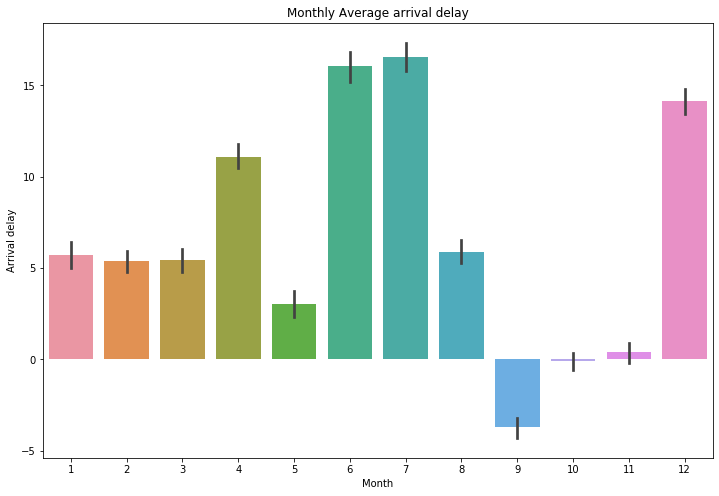

In [107]:
plt.figure(figsize = (12, 8))
sns.barplot(x='month', y='arr_delay', data=flt_data_copy,)
plt.title('Monthly Average arrival delay')
plt.xlabel('Month')
plt.ylabel('Arrival delay')
plt.savefig('A-007 monthly Arrival delay ')
plt.show()

    This shows that June, July and December, has the highest delay in Arrival of flight
    whereas in  September most flights come before time

In [108]:
['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'US: US Airways', 'YV: Mesa Airlines', 'HA: Hawaiian Airlines', 'EV: Atlantic Southeast Airlines', 'FL: AirTran Airways', 'F9: Frontier Airlines', 'VX: Virgin America', 'B6: JetBlue Airways', '9E: Pinnacle Airlines', 'AS: Alaska Airlines']

['WN: Southwest Airlines',
 'AA: American Airlines',
 'MQ: American Eagle Airlines',
 'UA: United Airlines',
 'OO: Skywest Airlines',
 'DL: Delta Airlines',
 'US: US Airways',
 'YV: Mesa Airlines',
 'HA: Hawaiian Airlines',
 'EV: Atlantic Southeast Airlines',
 'FL: AirTran Airways',
 'F9: Frontier Airlines',
 'VX: Virgin America',
 'B6: JetBlue Airways',
 '9E: Pinnacle Airlines',
 'AS: Alaska Airlines']

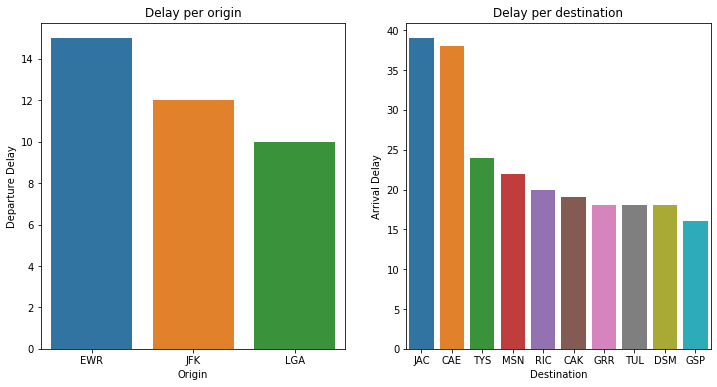

In [109]:
airport_delay = flt_data_copy.groupby(['dest'], as_index = False).agg({'arr_delay' :'mean'})
airport_delay = airport_delay.sort_values([('arr_delay')], ascending=False).head(10)
airport_delay['arr_delay'] = np.round(airport_delay['arr_delay'],0)

#Avg_arr_delay_ for destination in 2013
#plt.figure(figsize =(12, 8))
f, ax = plt.subplots(1,2,figsize = (12,6))
sns.barplot(x='dest', y='arr_delay',data=airport_delay,  ax = ax[1])
ax[1].set_title('Delay per destination')
ax[1].set_xlabel('Destination')
ax[1].set_ylabel('Arrival Delay')

origin_delay = flt_data_copy.groupby(['origin'], as_index = False).agg({'dep_delay' :'mean'})
origin_delay = origin_delay.sort_values([('dep_delay')], ascending=False).head(10)
origin_delay['dep_delay'] = np.round(origin_delay['dep_delay'],0)

#Avg_arr_delay_ for destination in 2013
#plt.figure(figsize =(12, 8))
sns.barplot(x='origin', y='dep_delay',data=origin_delay,  ax= ax[0])
ax[0].set_title('Delay per origin')
ax[0].set_xlabel('Origin')
ax[0].set_ylabel('Departure Delay')

plt.savefig('New A-001 Delay per Origin_Destnation')
plt.show()


# Problem Statement _ Ontime Departure & Arrival Analysis

In [110]:
flt_data_copy.loc[flt_data_copy['dep_delay']== 0, 'dep_status_ranking'] = 1
flt_data_copy.loc[flt_data_copy['dep_delay'] < 0, 'dep_status_ranking'] = 5
flt_data_copy.loc[flt_data_copy['dep_delay']>=1, 'dep_status_ranking'] = 2
flt_data_copy.loc[flt_data_copy['dep_delay']>=15, 'dep_status_ranking'] = 3
flt_data_copy.loc[flt_data_copy['dep_delay']>= 60, 'dep_status_ranking'] = 4


flt_data_copy.loc[flt_data_copy['arr_delay']== 0, 'arr_status_ranking'] = 1
flt_data_copy.loc[flt_data_copy['arr_delay'] < 0, 'arr_status_ranking'] = 2
flt_data_copy.loc[flt_data_copy['arr_delay']>= 1, 'arr_status_ranking'] = 3
flt_data_copy.loc[flt_data_copy['arr_delay']>= 15, 'arr_status_ranking'] = 4
flt_data_copy.loc[flt_data_copy['arr_delay']>= 60, 'arr_status_ranking'] = 5

C:\Users\bimal\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


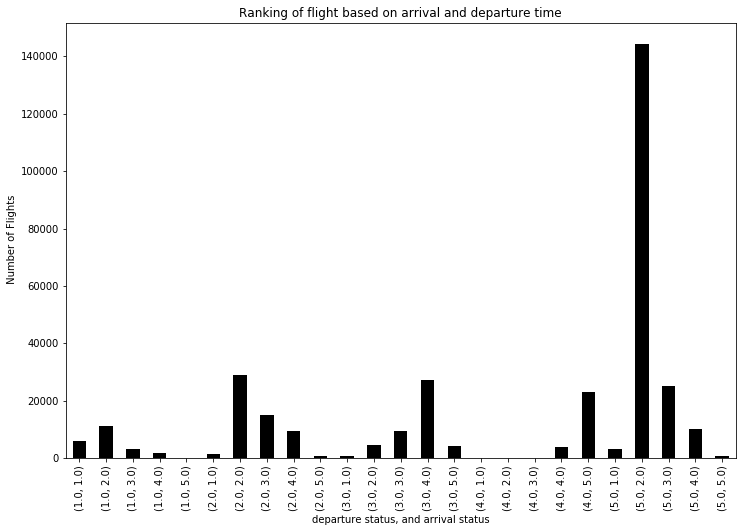

In [111]:
plt.figure(figsize = (12,8))
flt_data_copy.groupby(['dep_status_ranking','arr_status_ranking'])['carrier'].count().plot( kind = "bar" , color = 'k', )
plt.savefig('ranking based bar chart')
plt.title('Ranking of flight based on arrival and departure time')
plt.xlabel('departure status, and arrival status')
plt.ylabel(' Number of Flights')
plt.savefig('New A-002 ranking data')

ranking based on depature and arrival data shows  flights arriving  & departuring  early is high
but flights coming on time is very less

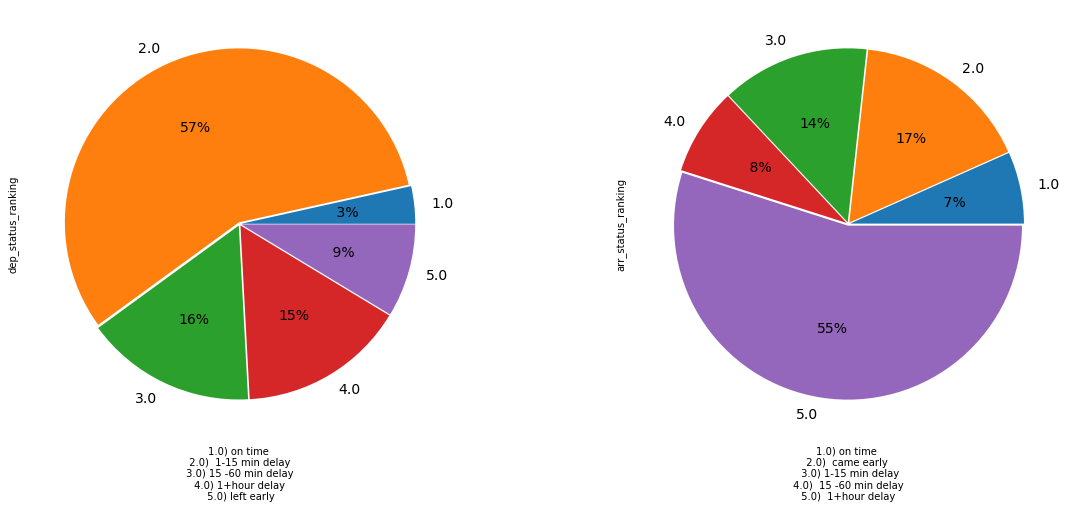

In [112]:
f, ax = plt.subplots(1,2, figsize=(20,8))
flt_data_copy.groupby('dep_status_ranking')['arr_status_ranking'].count().plot(kind = 'pie',ax = ax[1], legend = False, explode = [0.01,0.01,0.01,0.01,.01,],autopct = '%2.0f%%',fontsize = 14,)

flt_data_copy.groupby('arr_status_ranking')['dep_status_ranking'].count().plot(kind = 'pie', legend = False, explode = [0.01,0.01,0.01,0.01,0.01],autopct = '%2.0f%%',fontsize = 14, ax = ax[0])
#ax[0].set_xlabel('1 dep \n 2status_ranking')
#ax[1].set_xlabel('arr_status_ranking')

ax[0].set_xlabel('1.0) on time \n 2.0)  1-15 min delay \n 3.0) 15 -60 min delay \n 4.0) 1+hour delay \n 5.0) left early')

ax[1].set_xlabel('1.0) on time \n 2.0)  came early  \n 3.0) 1-15 min delay\n 4.0)  15 -60 min delay \n 5.0)  1+hour delay ')
plt.savefig(' new ranking pie')


C:\Users\bimal\Anaconda3\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'hue'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


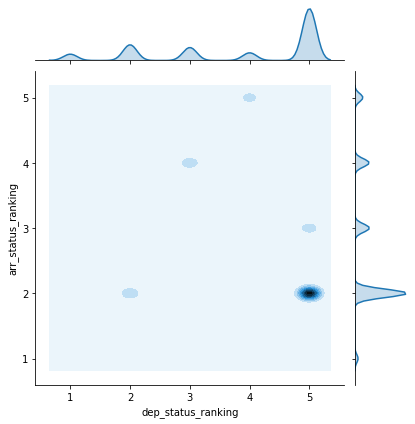

In [113]:
sns.jointplot(x= 'dep_status_ranking', y = 'arr_status_ranking', data = flt_data_copy,  hue = 'carrier', kind='kde')
plt.savefig(' New density plot of arrival vs departure time')
#plt.title('departure time ranking vs arrival time ranking')

this show the flights which are ontime is too less 

but flights which departure before scheduled time arrives early and this need to be controlled 
so if we are able to control this we will be able to control 57% of delay issues.


In [114]:
flt_data_copy.loc[flt_data_copy['dep_delay'] == 0, 'Status'] = 'On time'
flt_data_copy.loc[flt_data_copy['dep_delay'] < 0, 'Status'] = 'Left Early'
flt_data_copy.loc[flt_data_copy['dep_delay'] >= 1, 'Status'] = ' 1-15 minutes'
flt_data_copy.loc[flt_data_copy['dep_delay'] >= 15, 'Status'] = '15 min -1 hour'
flt_data_copy.loc[flt_data_copy['dep_delay'] >= 60, 'Status'] = '1+ hour delay'

C:\Users\bimal\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\bimal\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


C:\Users\bimal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\bimal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


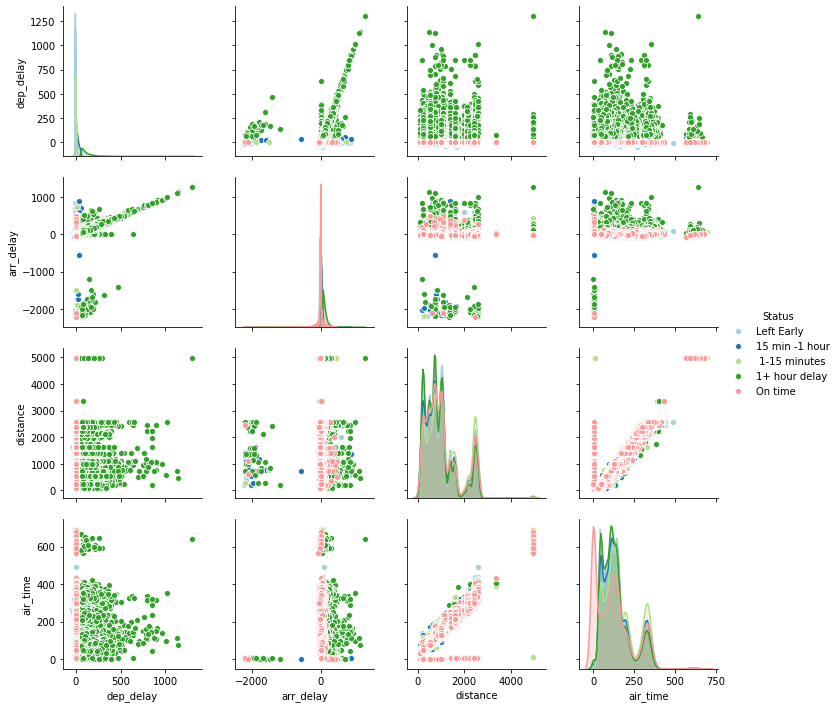

<Figure size 432x288 with 0 Axes>

In [115]:
Airlines_info_departure = sns.pairplot(flt_data_copy, vars=['dep_delay','arr_delay','distance','air_time',], hue='Status', palette="Paired")
plt.show(Airlines_info_departure)
plt.savefig('New departure delay pairplot Analysis.png')
plt.show()

    > when the distance is below 2000 miles then the  arrival delay is less 

    > so delay depends on distance and airtime

    > airtime increases with  distance


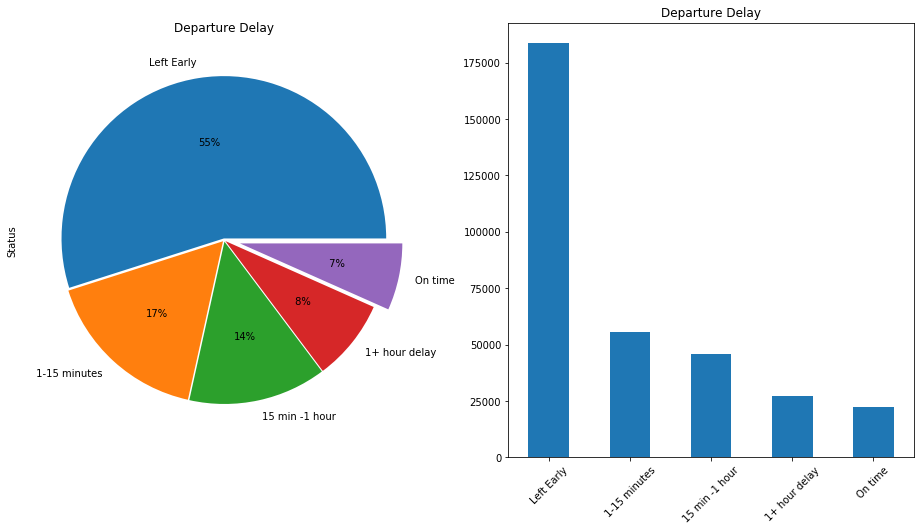

<Figure size 720x360 with 0 Axes>

In [116]:
f, ax = plt.subplots(1,2, figsize = (16, 8))
flt_data_copy['Status'].value_counts().plot(kind = 'pie',ax = ax[0], explode = [0.01,0.01,.01,.01,.1], autopct = '%2.0f%%', shadow = False)
ax[0].set_title('Departure Delay')

plt.figure(figsize = (10, 5))
flt_data_copy['Status'].value_counts().plot(kind = 'bar',ax = ax[1], rot = 45)
ax[1].set_title('Departure Delay')
plt.savefig('A-009  departure delay Analysis.png')
plt.show()

# On time Arrival delay

In [117]:
# Updating status of dep_delay

flt_data_copy.loc[flt_data_copy['arr_delay'] == 0, 'Status'] = 'On Time'
flt_data_copy.loc[flt_data_copy['arr_delay'] < 0, 'Status'] = 'Came Early'
flt_data_copy.loc[flt_data_copy['arr_delay'] >= 1, 'Status'] = 'Less than 15 minutes'
flt_data_copy.loc[flt_data_copy['arr_delay'] >= 15, 'Status'] = 'More than 15 minutes'
flt_data_copy.loc[flt_data_copy['arr_delay'] >= 60, 'Status'] = '1 hour plus'


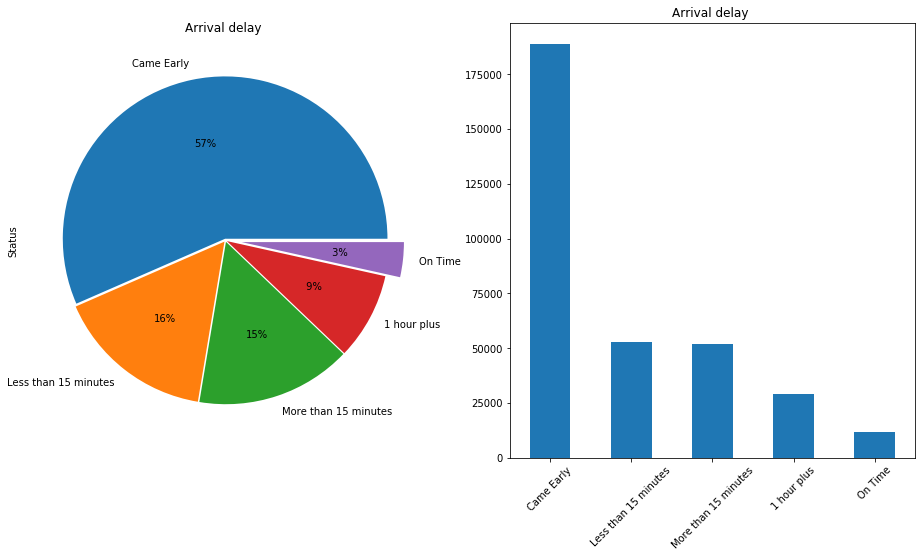

<Figure size 576x576 with 0 Axes>

In [118]:
f, ax = plt.subplots(1,2, figsize = (16, 8))
plt.figure(figsize = (8, 8))
flt_data_copy['Status'].value_counts().plot(kind = 'pie', ax=ax[0], explode = [0.01,0.01,.01,.01,.1],autopct = '%2.0f%%', legend = False,)
ax[0].set_title('Arrival delay ')

#flt_data_copy['Status'].value_counts().plot(kind = 'bar', ax=ax[1])
flt_data_copy['Status'].value_counts().plot(kind = 'bar',ax = ax[1], rot = 45)
#sns.barplot(x = 'Status', y = 'arr_delay', data = flt_data_copy, ax= ax[1], )
ax[1].set_title('Arrival delay ')
plt.savefig('B-0011  Arrival delay Analysis ok.png')
plt.show()

In [135]:

flt_data_copy.loc[flt_data_copy['dep_delay'] == 0, 'Status'] = 'On time'
flt_data_copy.loc[flt_data_copy['dep_delay'] < 0, 'Status'] = 'Left Early'
flt_data_copy.loc[flt_data_copy['dep_delay'] >= 1, 'Status'] = ' 1-15 minutes'
flt_data_copy.loc[flt_data_copy['dep_delay'] >= 15, 'Status'] = '15 min -1 hour'
flt_data_copy.loc[flt_data_copy['dep_delay'] >= 60, 'Status'] = '1+ hour delay'


Delayed_flights = flt_data_copy[(flt_data_copy.Status>= ' 1-15 minutes') &  (flt_data_copy.Status<='1+ hour delay')]
Delayed_flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'speed', 'DATE', 'month_desc', 'dep_status_ranking',
       'arr_status_ranking', 'Status'],
      dtype='object')

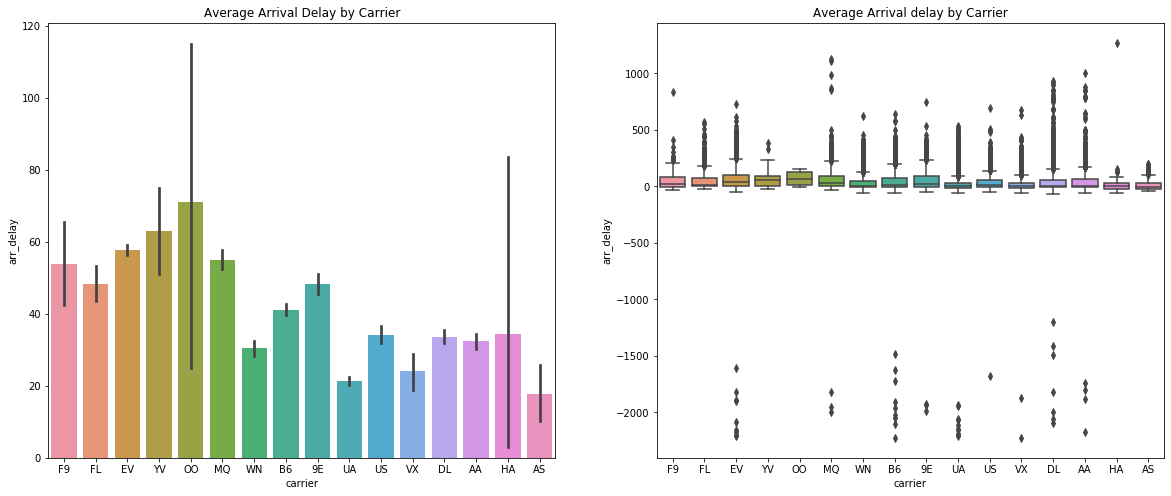

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'US: US Airways', 'YV: Mesa Airlines', 'HA: Hawaiian Airlines', 'EV: Atlantic Southeast Airlines', 'FL: AirTran Airways', 'F9: Frontier Airlines', 'VX: Virgin America', 'B6: JetBlue Airways', '9E: Pinnacle Airlines', 'AS: Alaska Airlines']


The top 5 US airline (American Airlines (AA), Southwest Airlines (WN), Delta Air Lines (DL), United Airlines (UA), Alaska Airlines (AS)generate an average delay of 37.2 minutes. Alaska Airlines, with an 34 minutes per flight, the lowest of all the carriers.


Carriers with higher average delay generation are Skywest Airlines(OO) with 70 minutes per flight,  Mesa Airlines (YV) with 60 minutes per flight, and Atlantic Southeast Airlines (EV) with 59 minutes per flight. The error bar provide the insight that airlines with low number of flights having higher standard deviation distribution from the mean

In [136]:
#Average arrival delay by carrier
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('carrier','arr_delay', data=Delayed_flights,ax=ax[0], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
                                                                                 
ax[0].set_title('Average Arrival Delay by Carrier')
sns.boxplot('carrier','arr_delay', data=Delayed_flights,ax=ax[1], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
ax[1].set_title('Average Arrival delay by Carrier')
plt.savefig('B-0012  Delayed flight Analysis ok.png')
plt.show()

print(['WN: Southwest Airlines',
       'AA: American Airlines', 
       'MQ: American Eagle Airlines', 
       'UA: United Airlines',
       'OO: Skywest Airlines',
       'DL: Delta Airlines',
       'US: US Airways',
       'YV: Mesa Airlines',
       'HA: Hawaiian Airlines',
       'EV: Atlantic Southeast Airlines',
       'FL: AirTran Airways',
       'F9: Frontier Airlines',
       'VX: Virgin America',
       'B6: JetBlue Airways',
       '9E: Pinnacle Airlines',
       'AS: Alaska Airlines'])

print('\n')
print('The top 5 US airline (American Airlines (AA), Southwest Airlines (WN), Delta Air Lines (DL), United Airlines (UA), Alaska Airlines (AS)generate an average delay of 37.2 minutes. Alaska Airlines, with an 34 minutes per flight, the lowest of all the carriers.')
print('\n')
print('Carriers with higher average delay generation are Skywest Airlines(OO) with 70 minutes per flight,  Mesa Airlines (YV) with 60 minutes per flight, and Atlantic Southeast Airlines (EV) with 59 minutes per flight. The error bar provide the insight that airlines with low number of flights having higher standard deviation distribution from the mean  (OO, HA, YV, F9, AS); so it seems like size matters.')
print('\n')
print('The boxplot shows, airlines with higher number of flights results having a higher chance of extreme waiting situation. American Eagle Airlines (MQ), American Airlines(AA), Delta Airline(DL) registered the maximum Carrier Delay for 2013 with an exception of Hawaiian Airlines (HA).')
print('\n')

Carriers with Higher avg delay generation are OO with 60 minutes, YV with 50 minutes, EV47 minutes,  9E with 49 minutes.

The error bar shows that, carriers with low number of flights have higher std from mean (OO, HA, YV, F9, AS)
So it seems like size matters.

Box plot shows that 
Higher the number of flights higher the chance of extreme waiting situation
Example: MQ DL AA
but HA is an exception
    

# Problem Statement _ Performance Analysis

In [137]:
scheduled_dep_time = flt_data_copy.count()['sched_dep_time']
actual_dep_time = flt_data_copy.count()['dep_time']
cancelled_flight = scheduled_dep_time-actual_dep_time

In [138]:
print('the number of cancelled flights is {}'.format(cancelled_flight))

the number of cancelled flights is 0


In [139]:
# The day and month having highest average delay departure by 
dep_delay = flt_data_copy.groupby(['day', 'month','flight'], as_index = False).agg({'dep_delay': 'mean'})

dep_delay_max = dep_delay['dep_delay'].max()
dep_delay_info = dep_delay[dep_delay['dep_delay']==dep_delay_max]

print('The Maximum delay  in 2013 was on  \n {}'.format(dep_delay_info)) 

The Maximum delay  in 2013 was on  
        day  month  flight  dep_delay
79178    9      1      51     1301.0


In [140]:
 #The day and month having highest number of flight delay
flightdelay = flt_data_copy[flt_data_copy['dep_delay']>0].groupby(['day', 'month'], as_index = False).agg({'flight': 'count'})
flightdelay_max = flightdelay['flight'].max()
flightdelay_info = flightdelay[flightdelay['flight']== flightdelay_max]
print('This shows that the highest number of delay in 2013 occured at \n {}'.format(flightdelay_info))

This shows that the highest number of delay in 2013 occured at 
      day  month  flight
275   23     12     674


In [141]:
print("Skewness_arr: %f" % flt_data_copy['arr_delay'].skew())
print("Kurtosis_arr: %f" % flt_data_copy['arr_delay'].kurt())
print("Skewness_dep: %f" % flt_data_copy['dep_delay'].skew())
print("Kurtosis_dep: %f" % flt_data_copy['dep_delay'].kurt())

Skewness_arr: -10.215985
Kurtosis_arr: 459.311939
Skewness_dep: 4.847809
Kurtosis_dep: 44.714626


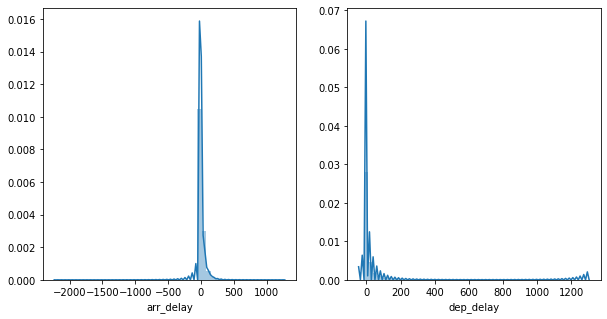

In [142]:
f, ax, = plt.subplots(1,2, figsize =(10,5))
sns.distplot(flt_data_copy['dep_delay'],ax= ax[1] )
sns.distplot(flt_data_copy['arr_delay'], ax =ax[0])
plt.savefig('B-0013  arr vs dep delay ok')
plt.show()

SKewness >1 so the distribution is highly positive

Kurtosis >3 shows that it is a Leptokurtic distribution i.e with longer tail with central peak higher and sharper

Histogram shows delay is on left side of Graph with a long tail to right this shows that delays are short and and mostly loaded in time

# Top 5 destination where flight arrives early than expected arrival time

In [143]:
early_flights = flt_data_copy[flt_data_copy['Status']<='Came Early']

top10_early_dest = early_flights.sort_values(by = 'arr_delay', ascending = True).head(5)


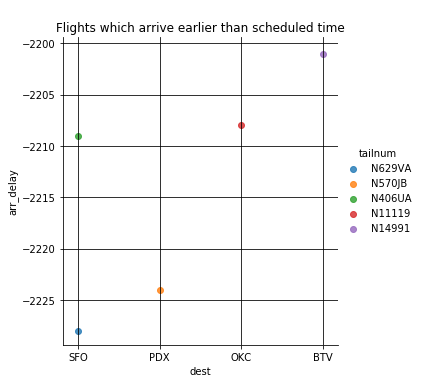

In [144]:
sns.lmplot(x = 'dest', y = 'arr_delay', data = top10_early_dest, fit_reg=False, hue="tailnum")
plt.grid(True, color='k')
plt.title('\nFlights which arrive earlier than scheduled time')
plt.savefig('B-0014 Flights which arrive early')


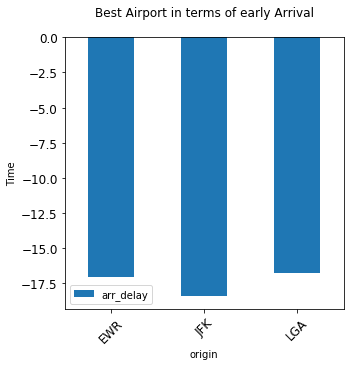

In [145]:
#Airport in terms of early departure from NYC
airport_info = pd.DataFrame(flt_data_copy, columns =['day', 'month', 'dep_delay','arr_delay', 'carrier','origin','dest','flight'])

airport_origin = airport_info[airport_info['arr_delay']<0]
best_airport = airport_origin.sort_values(['arr_delay']).groupby(['origin']).agg({'arr_delay':'mean'})
best_airport.plot(kind = 'bar', title = 'Best Airport in terms of early Arrival\n',rot = 45, figsize = (5,5),fontsize = 12)
plt.ylabel('Time')
plt.savefig('B-0014 Best aritport in terms of early arrival')
plt.show()

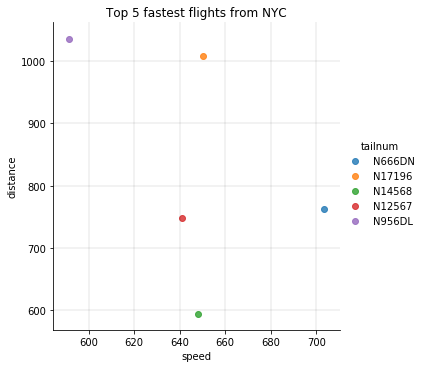

In [146]:
# Finding the top highspeed flights in 2013
top5 = flt_data_copy.sort_values(by = 'speed', ascending = False).head(5)
sns.lmplot(y = 'distance',x = 'speed', data = top5, hue = 'tailnum',fit_reg = False)
plt.grid(True, color = 'k', linewidth = 0.1)
plt.title("Top 5 fastest flights from NYC")
plt.savefig('B-0015 op 5 fastest flights from NYC')
plt.show()

C:\Users\bimal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\bimal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


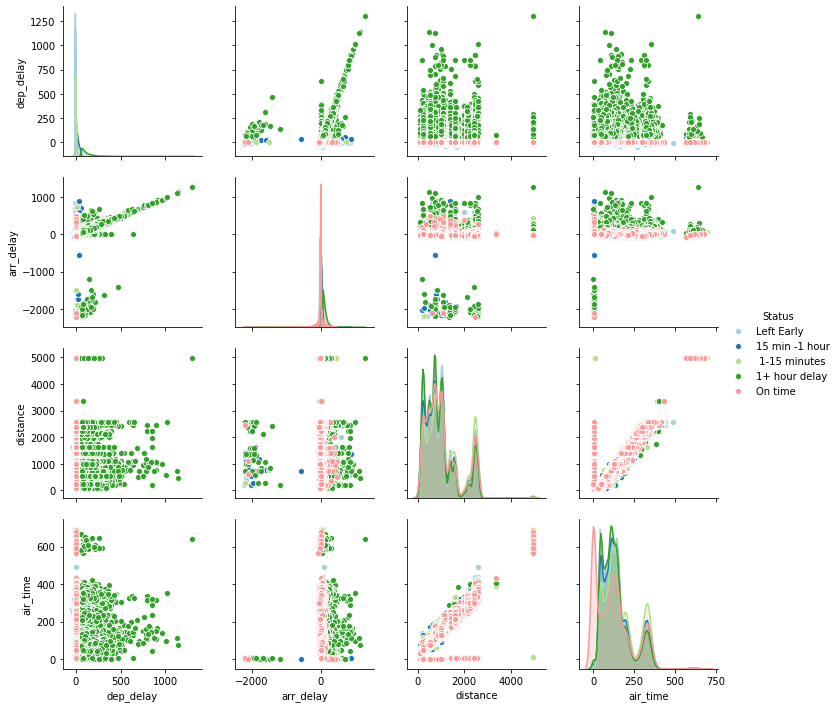

<Figure size 432x288 with 0 Axes>

In [147]:
Airlines_info_arrival= sns.pairplot(flt_data_copy, vars=['dep_delay','arr_delay','distance','air_time',], hue='Status', palette="Paired")
plt.show(Airlines_info_arrival)
plt.savefig('B-0016 Pairplot analysis of dep delay ok.png')
plt.show()

(5.0, 0.0)

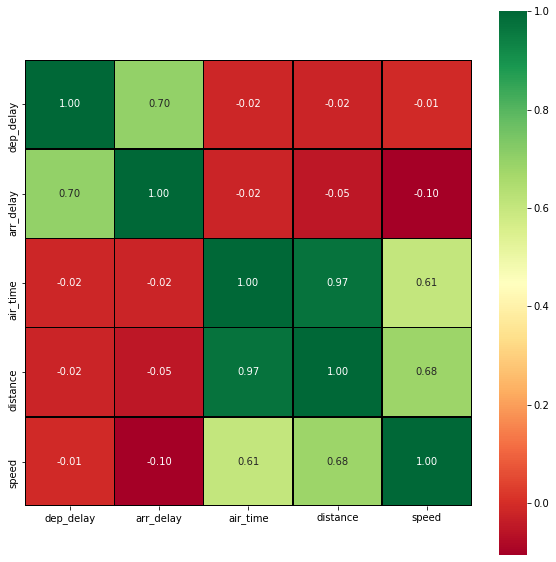

In [176]:
plt.figure(figsize=(10, 10))
flt_corr= flt_data_copy.drop(['dep_time','sched_dep_time','arr_time','day','dep_status_ranking','arr_status_ranking', 'month', 'sched_arr_time','hour','minute', 'time_hour','month_desc','year','flight'], axis=1)
flt_corr= flt_corr.corr()
ax = sns.heatmap(flt_corr,  cmap="RdYlGn", square = True, linewidth=.5, linecolor= 'k', annot=True, fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)